<a href="https://colab.research.google.com/github/subhankar-nitt/Fraud-detection-demo/blob/subhankar/Spark-Streaming/PCA_Analysis_andRule_on_distance_between_last_two_transcation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****Topic - Rule extraction for Fraud detection DataSet****
# ****Data- 18/06/2021****
# ****Description - In this notebook we will try to extract rules can be used to tag the database based on outliers.****

# **Loading the DataSet and analysing it**

In [ ]:
#mounting the gdrive here
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#importing the python libraries to be used in this session
import pandas as pd  #used for data analysis
import numpy as np #used for numerical calculations
import seaborn as sns #used for data visualization and plotting
import matplotlib.pyplot as plt  #used for data visualization and plotting
%matplotlib inline

In [ ]:
#importing the dataset using pandas

data = pd.read_csv("/content/drive/MyDrive/kaggle/CCDMS_dataset.csv") #reading the data from the dataset,find the dataset description in the readme file


In [ ]:
data.head(10) #showing the first 10 data of the dataset 

,trans_id,trans_date_trans_time,card_num,merchant,purchase_category,trans_amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,debit_credit_indicator,trans_type,card_type
0,1,6/21/2020 12:14,3573030041201290,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,debit,purchase,NaN
1,2,6/21/2020 12:14,3598215285024750,"Swaniawski, Nitzsche and Welch",health,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,debit,purchase,NaN
2,3,6/21/2020 12:15,3591919803438420,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,debit,purchase,NaN
3,4,6/21/2020 12:15,3526826139003040,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,debit,purchase,NaN
4,5,6/21/2020 12:15,30407675418785,Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,14816,42.1939,-76.7361,520,Psychotherapist,10/13/1991,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,debit,purchase,NaN
5,6,6/21/2020 12:15,213180742685905,Romaguera Ltd,health,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.5070,-123.9743,1139,"Therapist, occupational",1/15/1951,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,debit,purchase,NaN
6,7,6/21/2020 12:15,3589289942931260,Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.7557,-97.5936,343,"Development worker, international aid",3/5/1972,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,debit,purchase,NaN
7,8,6/21/2020 12:16,3596357274378600,"Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,PA,16858,41.0001,-78.2357,3688,Advice worker,5/27/1973,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,debit,purchase,NaN
8,9,6/21/2020 12:16,3546897637165770,Kilback Group,food,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,76678,31.6591,-96.8094,263,Barrister,5/30/1956,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,debit,payments,NaN
9,10,6/21/2020 12:16,2242542703101230,"Feil, Hilpert and Koss",food,7.01,Samuel,Jenkins,M,43235 Mckenzie Views Apt. 837,Westport,KY,40077,38.4921,-85.4524,564,Pensions consultant,4/10/1996,3b8e4d02d9e1a3bf97cf449eb0317f2c,1371816980,38.977546,-84.727994,debit,payments,NaN


In [ ]:
data.describe() # describes the different dataSet fields, and there properties

,trans_id,card_num,trans_amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,card_type
count,555718.000000,5.557180e+05,555718.000000,555718.000000,555718.000000,555718.000000,5.557180e+05,5.557180e+05,555718.000000,555718.000000,0.0
mean,277859.500000,4.178312e+17,69.392930,48842.663345,38.543261,-90.231342,8.822145e+04,1.380679e+09,38.542806,-90.231397,NaN
std,160422.112784,1.309826e+18,156.746057,26855.294575,5.061337,13.721786,3.003910e+05,5.201095e+06,5.095830,13.733078,NaN
min,1.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,NaN
25%,138930.250000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755316,-96.905148,NaN
50%,277859.500000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376608,-87.445206,NaN
75%,416788.750000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954165,-80.264631,NaN
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,NaN


In [ ]:
data.isnull().sum() #checking the total number of null values in the dataset

trans_id                       0
trans_date_trans_time          0
card_num                       0
merchant                       0
purchase_category              0
trans_amt                      0
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
debit_credit_indicator         0
trans_type                     0
card_type                 555718
dtype: int64

<AxesSubplot:>

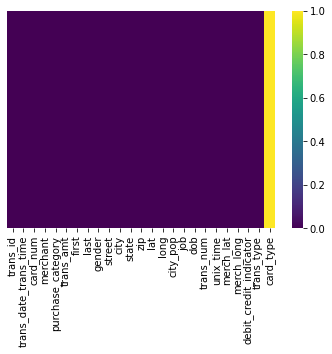

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis') #creating a heatmap to check the fields having null values graphically

In [ ]:
#As we have seen that the card_type field having only null values so we are discarding that field
data = data.drop(["card_type"],axis=1)

In [ ]:
#checking wheather the card_type field is discarded or not

data.head(2)

,trans_id,trans_date_trans_time,card_num,merchant,purchase_category,trans_amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,debit_credit_indicator,trans_type
0,1,6/21/2020 12:14,3573030041201290,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,debit,purchase
1,2,6/21/2020 12:14,3598215285024750,"Swaniawski, Nitzsche and Welch",health,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,debit,purchase


In [ ]:
#removing some fields that does not add value to the data set as the first and last name , street,city,zip,state,trans_num,

data = data.drop(['first','last','state','city','street','zip'],axis=1)


In [ ]:
#checking the columns which are present which are present
data.columns

Index(['trans_id', 'trans_date_trans_time', 'card_num', 'merchant',
       'purchase_category', 'trans_amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'debit_credit_indicator', 'trans_type'],
      dtype='object')

In [ ]:
#Hot endcoding the gender field to 0 and 1for ease of use
data = pd.get_dummies(data=data,columns=['gender'],drop_first=True)
data.head(2) #checking wheather it has been dropped successfully dropped or not

,trans_id,trans_date_trans_time,card_num,merchant,purchase_category,trans_amt,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,debit_credit_indicator,trans_type,gender_M
0,1,6/21/2020 12:14,3573030041201290,Sporer-Keebler,personal_care,29.84,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,debit,purchase,0
1,2,6/21/2020 12:14,3598215285024750,"Swaniawski, Nitzsche and Welch",health,41.28,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,debit,purchase,0


# **PCA ANALYSIS OF THE DATASET FOR CHECKING THE CO-REALATION OF THE FIELDS**

In [ ]:
#describing  different types of fields in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   trans_id                555718 non-null  int64  
 1   trans_date_trans_time   555718 non-null  object 
 2   card_num                555718 non-null  int64  
 3   merchant                555718 non-null  object 
 4   purchase_category       555718 non-null  object 
 5   trans_amt               555718 non-null  float64
 6   lat                     555718 non-null  float64
 7   long                    555718 non-null  float64
 8   city_pop                555718 non-null  int64  
 9   job                     555718 non-null  object 
 10  dob                     555718 non-null  object 
 11  trans_num               555718 non-null  object 
 12  unix_time               555718 non-null  int64  
 13  merch_lat               555718 non-null  float64
 14  merch_long          

In [ ]:
#selecting few specific columns for analysis
pca_data = data.drop(['trans_id','trans_date_trans_time','merchant','purchase_category','job','dob','trans_num','trans_type','debit_credit_indicator'],axis=1)

In [ ]:
#checking wheather all the fields are dropped or not
pca_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   card_num    555718 non-null  int64  
 1   trans_amt   555718 non-null  float64
 2   lat         555718 non-null  float64
 3   long        555718 non-null  float64
 4   city_pop    555718 non-null  int64  
 5   unix_time   555718 non-null  int64  
 6   merch_lat   555718 non-null  float64
 7   merch_long  555718 non-null  float64
 8   gender_M    555718 non-null  uint8  
dtypes: float64(5), int64(3), uint8(1)
memory usage: 34.4 MB


In [ ]:
#importing standardScaler form sklearn to scale the data set
from sklearn.preprocessing import StandardScaler

In [ ]:
#scaling the range of each data
scaler = StandardScaler() #initializing the StandardScaler
scaler.fit(pca_data) #fitting the data into the scaler
scaled_data =scaler.transform(pca_data) # transforming the data is the scaled version

In [ ]:
#printint the scaled data
display(scaled_data)

array([[-0.31626993, -0.25233787,  0.35118004, ...,  0.17812462,
        -1.43660819, -0.90703225],
       [-0.3162507 , -0.17935351,  0.42076646, ...,  0.38325566,
         1.16764067, -0.90703225],
       [-0.31625551, -0.05960557, -1.97054058, ..., -1.90948607,
         0.68071734,  1.10249663],
       ...,
       [-0.31440808,  0.11156316,  1.51211938, ...,  1.59258473,
        -2.14691013, -0.90703225],
       [-0.31899468, -0.39173544,  1.20170705, ...,  1.16324998,
        -1.95509819,  1.10249663],
       [-0.31581364, -0.19944973, -0.56838018, ..., -0.45776861,
        -0.49551757,  1.10249663]])

In [ ]:
#importing the PCA  from sklearn module
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2) #dividing the data into two principle components
pca.fit(pca_data) #fit data to pca model
data_pca = pca.transform(pca_data) #transform into two components



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

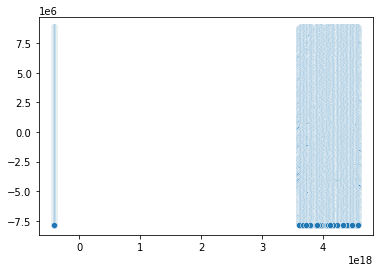

In [ ]:
#plotting the two principle components 
sns.scatterplot(data_pca[:,0],data_pca[:,1])

In [ ]:
print(pca.components_) #print two component of the pca

[[ 1.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-0.00000000e+00  2.93491106e-08 -2.45907700e-10  3.95025543e-09
   4.31499648e-05 -9.99999999e-01 -3.10685531e-10  4.01963693e-09
   5.49824889e-11]]


<AxesSubplot:>

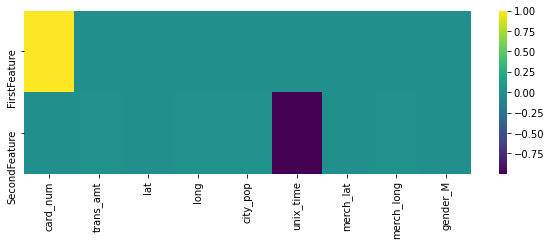

In [ ]:
#Describing the co-relation of features in the heatmap where the same color index meaning they are increasing or decreasing propotionally

plt.figure(figsize=(10,3))
sns.heatmap(pca.components_,cmap='viridis',yticklabels=['FirstFeature','SecondFeature'],xticklabels=pca_data.columns)

using t-SNE for feature extraction

In [ ]:
#import TSNE from sklearn

from sklearn.manifold import TSNE


In [ ]:
#error taking a long time

tsne = TSNE(n_components=2,random_state=0) #initializing the TSNE 
data_tsne = tsne.fit_transform(pca_data) #fitting the data frame and transforming it

# **Extracting rule based on the time vs distance from the last transaction**

In [ ]:
#count of the unique credit cards 
len(data['card_num'].unique())

925

In [ ]:
#grouping by creditcard numbers
unique_cards=data.groupby(["card_num"]).size().to_frame("no of time").reset_index()

In [ ]:
#function to calculate speed from the lat and long of two place
def getDistance(lat1,lat2,lon1,lon2,time):
  rad = 6371 #radious of the earth is 6371

  #converting to radians for different 
  lat1=np.radians(lat1)  
  lat2=np.radians(lat2)
  lon1=np.radians(lon1)
  lon2=np.radians(lon2)

  #difference between two places latitude and longitude
  dlat = lat2-lat1
  dlon = lon2-lon1

  #formula to claculate the distance between two place
  a = np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2

  c = np.sqrt(a)
  #distance / time = speed , returning the speed for the   
  return c*rad/time

In [ ]:
data['speed']=0.0 #creating a new column with speed field 

In [ ]:
data.info() #checking the types of data in all fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   trans_id                555718 non-null  int64  
 1   trans_date_trans_time   555718 non-null  object 
 2   card_num                555718 non-null  int64  
 3   merchant                555718 non-null  object 
 4   purchase_category       555718 non-null  object 
 5   trans_amt               555718 non-null  float64
 6   first                   555718 non-null  object 
 7   last                    555718 non-null  object 
 8   gender                  555718 non-null  object 
 9   street                  555718 non-null  object 
 10  city                    555718 non-null  object 
 11  state                   555718 non-null  object 
 12  zip                     555718 non-null  int64  
 13  lat                     555718 non-null  float64
 14  long                

In [ ]:
speed={}  #creating a empty dictionary

#checking each card number and making a directory with key as card number and value as a list of speed which is calculated as 
#distance between the last two transaction / the time difference between last two transaction
for num in unique_cards.card_num:  

  each_card = data[data.card_num ==num]
  i =0 
  time_diff=(each_card.unix_time-each_card.unix_time.shift(1))/3600

  speed_approx = getDistance(each_card.merch_lat.shift(1),each_card.merch_lat,each_card.merch_long.shift(1),each_card.merch_long,time_diff).tolist()
  speed[num]=speed_approx


In [ ]:
#adding the speed to each customer row 

#creating an empty dataframe with same column as the main dataframe
df_cols = data.columns
df = pd.DataFrame(columns=df_cols)

#retrive all the transactions card numberwise and retrive the speed from the speed dictionary and append those values in the speed fields
for card in unique_cards.card_num:
    dataSet =data[data.card_num == card]
    speedlist = speed[card]
    i=0
    for index in dataSet.trans_id:
      dataSet.at[index-1,'speed']=speedlist[i]
      i+=1
    #print(len(speedlist),len(dataSet))
    #display(dataSet.head())
    df=df.append(dataSet)


In [ ]:
df['speed']=df['speed'].fillna(0) #filling the NaN values with 0

In [ ]:
df.head() #showing the df head 

,trans_id,trans_date_trans_time,card_num,merchant,purchase_category,trans_amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,debit_credit_indicator,trans_type,card_type,speed
156,157,6/21/2020 13:05,60416207185,Kutch-Ferry,home,124.66,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,2/17/1986,f21e1a09f59c50a66735409308285b1d,1371819942,42.945526,-108.530901,debit,purchase,NaN,0.000000
740,741,6/21/2020 16:25,60416207185,Halvorson Group,misc_pos,78.52,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,2/17/1986,08f67c9765438973006f8250351d8c1f,1371831936,42.193130,-108.682054,debit,purchase,NaN,12.692246
3046,3047,6/22/2020 7:58,60416207185,Conroy-Cruickshank,gas_transport,65.25,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,2/17/1986,ca1f04d9d549c507356ffa8f9b43d81f,1371887913,43.932724,-109.699794,debit,purchase,NaN,6.764004
4350,4351,6/22/2020 15:32,60416207185,Larkin Ltd,kids_pets,87.74,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,2/17/1986,d671d98fded8ca75d799959a444577a5,1371915151,43.546064,-109.212939,debit,purchase,NaN,3.841013
7694,7695,6/23/2020 12:28,60416207185,Leffler-Goldner,personal_care,148.02,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,2/17/1986,86d346444b5b262159976aa4d8b64fbb,1371990534,42.876538,-109.333220,debit,purchase,NaN,1.792834


In [ ]:
#laying off some of the not so important fields
cleaned_data=df.drop(['first','last','trans_date_trans_time','city_pop','dob','trans_num','card_type','street','city','state','zip','debit_credit_indicator','trans_type'],axis=1)

In [ ]:
cleaned_data = pd.get_dummies(cleaned_data,columns=['gender'],drop_first=True)

In [ ]:
#chenging gender type as object to numeric
cleaned_data['gender_M']=cleaned_data['gender_M'].astype('str').astype('int')

In [ ]:
#dimensions of the data
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555718 entries, 156 to 553882
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trans_id           555718 non-null  object 
 1   card_num           555718 non-null  object 
 2   merchant           555718 non-null  object 
 3   purchase_category  555718 non-null  object 
 4   trans_amt          555718 non-null  float64
 5   lat                555718 non-null  float64
 6   long               555718 non-null  float64
 7   job                555718 non-null  object 
 8   unix_time          555718 non-null  object 
 9   merch_lat          555718 non-null  float64
 10  merch_long         555718 non-null  float64
 11  speed              555718 non-null  float64
 12  gender_M           555718 non-null  int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 59.4+ MB


In [ ]:
cleaned_data.head()

,trans_id,card_num,merchant,purchase_category,trans_amt,lat,long,job,unix_time,merch_lat,merch_long,speed,gender_M
156,157,60416207185,Kutch-Ferry,home,124.66,43.0048,-108.8964,Information systems manager,1371819942,42.945526,-108.530901,0.000000,0
740,741,60416207185,Halvorson Group,misc_pos,78.52,43.0048,-108.8964,Information systems manager,1371831936,42.193130,-108.682054,12.692246,0
3046,3047,60416207185,Conroy-Cruickshank,gas_transport,65.25,43.0048,-108.8964,Information systems manager,1371887913,43.932724,-109.699794,6.764004,0
4350,4351,60416207185,Larkin Ltd,kids_pets,87.74,43.0048,-108.8964,Information systems manager,1371915151,43.546064,-109.212939,3.841013,0
7694,7695,60416207185,Leffler-Goldner,personal_care,148.02,43.0048,-108.8964,Information systems manager,1371990534,42.876538,-109.333220,1.792834,0


In [ ]:
#taking an individual card user  defined as unique card 
unique_card=cleaned_data[cleaned_data['card_num']==4992346398065150000]
unique_card.head(4) #showing the first 4 values



,trans_id,card_num,merchant,purchase_category,trans_amt,lat,long,job,unix_time,merch_lat,merch_long,speed,gender_M
1627,1628,4992346398065150000,Ernser-Lynch,food,40.58,41.173,-89.2187,Audiological scientist,1371850896,40.381153,-89.112005,0.000000,1
2371,2372,4992346398065150000,"Hayes, Marquardt and Dibbert",misc_net,390.20,41.173,-89.2187,Audiological scientist,1371869777,42.155824,-88.837710,18.938387,1
2648,2649,4992346398065150000,Friesen Inc,shopping_pos,7.60,41.173,-89.2187,Audiological scientist,1371877080,41.234514,-88.551230,25.921361,1
4251,4252,4992346398065150000,Gleason and Sons,kids_pets,2.39,41.173,-89.2187,Audiological scientist,1371913487,40.189618,-88.340787,5.810877,1


# **checking rules based on transaction amt and speed from the merchant to get outliers**

In [ ]:
len(unique_card) #size of the unique_card data

863

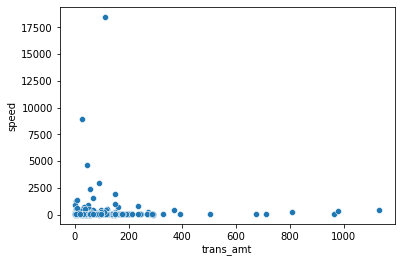

In [ ]:
sns.scatterplot(x="trans_amt",y="speed",data=unique_card) #checking the total transaction amount verses speed 

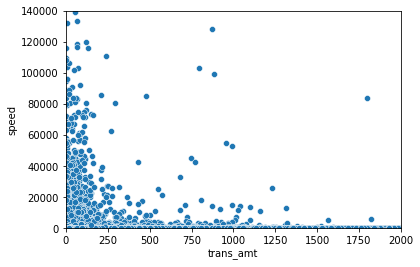

In [ ]:
#checking trans_amt vs speed for the full dataset

scatterPlot = sns.scatterplot(x="trans_amt",y="speed",data=cleaned_data)

#setting the x and y axis limits
scatterPlot.set(xlim=(0,2000))
scatterPlot.set(ylim=(0,140000))

plt.show()

In [ ]:
len(cleaned_data[cleaned_data.speed > 600]) #total no of points with speed more than 600 km/h(though normal flight speed is 900 km/h)
                                             #for saftey have taken this as 600km/h                   

10758

In [ ]:
#classifying and adding a new column if the speed is more than 600 km/h then tag it as  1 else 0
dup_cleaned_data = cleaned_data
dup_cleaned_data['suspectable_speed'] = cleaned_data['speed'].apply(lambda x: 1 if x>600 else 0)
dup_cleaned_data

,trans_id,card_num,merchant,purchase_category,trans_amt,lat,long,job,unix_time,merch_lat,merch_long,speed,gender_M,suspectable_speed
156,157,60416207185,Kutch-Ferry,home,124.66,43.0048,-108.8964,Information systems manager,1371819942,42.945526,-108.530901,0.000000,0,0
740,741,60416207185,Halvorson Group,misc_pos,78.52,43.0048,-108.8964,Information systems manager,1371831936,42.193130,-108.682054,12.692246,0,0
3046,3047,60416207185,Conroy-Cruickshank,gas_transport,65.25,43.0048,-108.8964,Information systems manager,1371887913,43.932724,-109.699794,6.764004,0,0
4350,4351,60416207185,Larkin Ltd,kids_pets,87.74,43.0048,-108.8964,Information systems manager,1371915151,43.546064,-109.212939,3.841013,0,0
7694,7695,60416207185,Leffler-Goldner,personal_care,148.02,43.0048,-108.8964,Information systems manager,1371990534,42.876538,-109.333220,1.792834,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552583,552584,4992346398065150000,Parisian and Sons,gas_transport,66.11,41.1730,-89.2187,Audiological scientist,1388455810,40.915589,-88.806426,24.638529,1,0
552891,552892,4992346398065150000,Bogisich-Homenick,misc_net,4.58,41.1730,-89.2187,Audiological scientist,1388466815,40.637488,-89.880600,15.634545,1,0
553558,553559,4992346398065150000,Erdman-Kertzmann,gas_transport,95.96,41.1730,-89.2187,Audiological scientist,1388488544,40.869708,-89.066993,6.066670,1,0
553559,553560,4992346398065150000,Stracke-Lemke,grocery_pos,149.48,41.1730,-89.2187,Audiological scientist,1388488645,41.437224,-90.132253,1947.075604,1,1


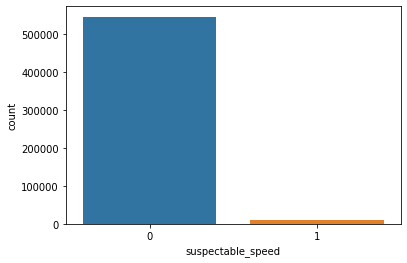

In [ ]:
sns.countplot(x="suspectable_speed",data=dup_cleaned_data)

In [ ]:
unique_card

,trans_id,card_num,merchant,purchase_category,trans_amt,lat,long,job,unix_time,merch_lat,merch_long,debit_credit_indicator,trans_type,gender_M,speed
1627,1628,4992346398065150000,Ernser-Lynch,food,40.58,41.173,-89.2187,Audiological scientist,1371850896,40.381153,-89.112005,debit,purchase,1,0.000000
2371,2372,4992346398065150000,"Hayes, Marquardt and Dibbert",misc_net,390.20,41.173,-89.2187,Audiological scientist,1371869777,42.155824,-88.837710,debit,purchase,1,18.938387
2648,2649,4992346398065150000,Friesen Inc,shopping_pos,7.60,41.173,-89.2187,Audiological scientist,1371877080,41.234514,-88.551230,debit,purchase,1,25.921361
4251,4252,4992346398065150000,Gleason and Sons,kids_pets,2.39,41.173,-89.2187,Audiological scientist,1371913487,40.189618,-88.340787,debit,purchase,1,5.810877
4798,4799,4992346398065150000,"Feil, Hilpert and Koss",food,35.43,41.173,-89.2187,Audiological scientist,1371923127,40.691328,-90.023732,debit,purchase,1,28.559865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552583,552584,4992346398065150000,Parisian and Sons,gas_transport,66.11,41.173,-89.2187,Audiological scientist,1388455810,40.915589,-88.806426,debit,misc_credits,1,24.638529
552891,552892,4992346398065150000,Bogisich-Homenick,misc_net,4.58,41.173,-89.2187,Audiological scientist,1388466815,40.637488,-89.880600,debit,misc_credits,1,15.634545
553558,553559,4992346398065150000,Erdman-Kertzmann,gas_transport,95.96,41.173,-89.2187,Audiological scientist,1388488544,40.869708,-89.066993,debit,misc_credits,1,6.066670
553559,553560,4992346398065150000,Stracke-Lemke,grocery_pos,149.48,41.173,-89.2187,Audiological scientist,1388488645,41.437224,-90.132253,debit,misc_credits,1,1947.075604


In [ ]:
dup_cleaned_data.head(4)

,trans_id,card_num,merchant,purchase_category,trans_amt,lat,long,job,unix_time,merch_lat,merch_long,speed,gender_M,suspectable_speed
156,157,60416207185,Kutch-Ferry,home,124.66,43.0048,-108.8964,Information systems manager,1371819942,42.945526,-108.530901,0.000000,0,0
740,741,60416207185,Halvorson Group,misc_pos,78.52,43.0048,-108.8964,Information systems manager,1371831936,42.193130,-108.682054,12.692246,0,0
3046,3047,60416207185,Conroy-Cruickshank,gas_transport,65.25,43.0048,-108.8964,Information systems manager,1371887913,43.932724,-109.699794,6.764004,0,0
4350,4351,60416207185,Larkin Ltd,kids_pets,87.74,43.0048,-108.8964,Information systems manager,1371915151,43.546064,-109.212939,3.841013,0,0


In [ ]:
group_data = dup_cleaned_data.sort_values('card_num') #sorting the dataset according to creditcard number


In [ ]:
group_data=group_data.reset_index().drop('index',axis=1) #removing the index column

In [ ]:
group_data.head(4)

,trans_id,card_num,merchant,purchase_category,trans_amt,lat,long,job,unix_time,merch_lat,merch_long,speed,gender_M,suspectable_speed
0,157,60416207185,Kutch-Ferry,home,124.66,43.0048,-108.8964,Information systems manager,1371819942,42.945526,-108.530901,0.000000,0,0
1,369292,60416207185,"Wiza, Schaden and Stark",misc_pos,13.82,43.0048,-108.8964,Information systems manager,1384172501,42.384495,-108.048072,3.069958,0,0
2,369297,60416207185,Auer LLC,personal_care,44.64,43.0048,-108.8964,Information systems manager,1384172666,43.593310,-109.570917,1993.851746,0,1
3,371914,60416207185,"Kutch, Hermiston and Farrell",gas_transport,39.37,43.0048,-108.8964,Information systems manager,1384306094,43.011321,-108.584666,1.386097,0,0


In [ ]:
count =0;
for i in range(len(group_data)):
    if(i!=0):
        if(group_data.iloc[i-1].card_num == group_data.iloc[i].card_num  and group_data.iloc[i-1].suspectable_speed ==1 ):
            #group_data.at[i,'suspectable_speed']=1
            if(group_data.iloc[i].unix_time-group_data.iloc[i-1].unix_time <180):
                group_data.at[i,'suspectable_speed']=1


In [ ]:
len(cleaned_data[cleaned_data.suspectable_speed ==1]) #total no of points with speed more than 600 km/h(though normal flight speed is 900 km/h)
                                             #for saftey have taken this as 600km/h                   

10758

In [ ]:
len(group_data[group_data.suspectable_speed==1]) #total points after applying the rule that consecutive fraud points

33136

In [ ]:
group_data.head(4) # successfully tagging the dataset based on customers speed

,trans_id,card_num,merchant,purchase_category,trans_amt,lat,long,job,unix_time,merch_lat,merch_long,speed,gender_M,suspectable_speed
0,157,60416207185,Kutch-Ferry,home,124.66,43.0048,-108.8964,Information systems manager,1371819942,42.945526,-108.530901,0.000000,0,0
1,369292,60416207185,"Wiza, Schaden and Stark",misc_pos,13.82,43.0048,-108.8964,Information systems manager,1384172501,42.384495,-108.048072,3.069958,0,0
2,369297,60416207185,Auer LLC,personal_care,44.64,43.0048,-108.8964,Information systems manager,1384172666,43.593310,-109.570917,1993.851746,0,1
3,371914,60416207185,"Kutch, Hermiston and Farrell",gas_transport,39.37,43.0048,-108.8964,Information systems manager,1384306094,43.011321,-108.584666,1.386097,0,0


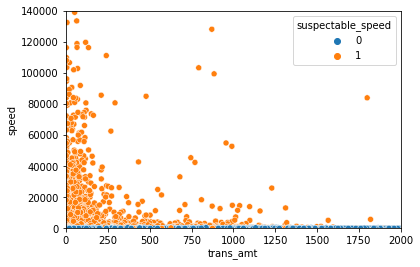

In [ ]:
#checking trans_amt vs speed for the tagged  dataset

scatterPlot = sns.scatterplot(x="trans_amt",y="speed",hue="suspectable_speed",data=group_data)

#setting the x and y axis limits
scatterPlot.set(xlim=(0,2000))
scatterPlot.set(ylim=(0,140000))

plt.show()

In [ ]:
#saving the dataframe as a csv file 
group_data.to_csv('/content/drive/MyDrive/kaggle/transaction_speed_tagged.csv',index=False)